In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

## Exploring the Ames Housing dataset

### Loading the Ames Housing dataset into a DataFrame

We are going to load only 6 out of 80 columns using `usecols=columns` option in Pandas dataframe.

In [3]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

In [4]:
df = pd.read_csv('AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

In [5]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.5+ KB


In [7]:
df.shape, df.size, len(df)

((2930, 6), 17580, 2930)

In [8]:
df.columns

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area', 'SalePrice'],
      dtype='object')

Let's now convert `Central Air` column into integer type. 

In [9]:
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})

In [10]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   int64  
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 137.5 KB


From this information we see that we have 1 missing value in `Total Bsmt SF`. We are going to drop it.

In [12]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [13]:
df = df.dropna(axis='rows')

In [14]:
df.shape

(2929, 6)

In [15]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

### Visualizing the important characteristics of a dataset

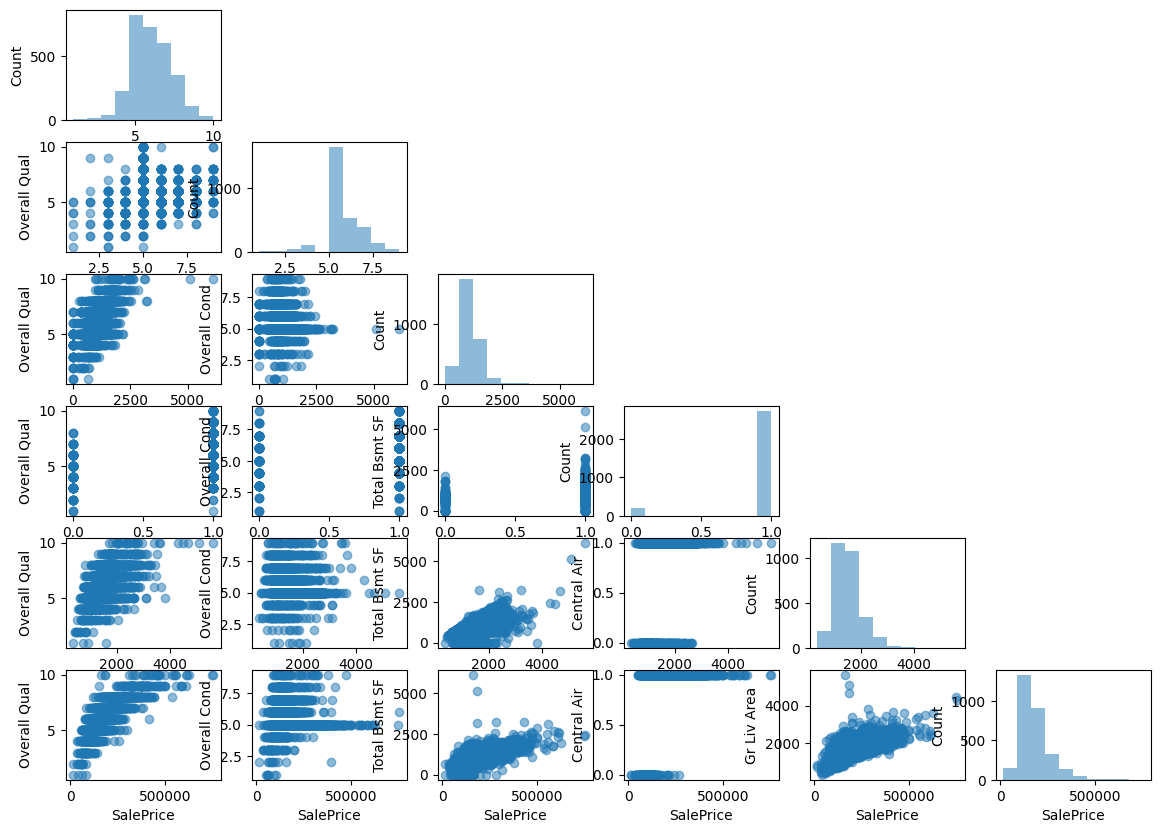

In [28]:
fig, axes = scatterplotmatrix(df.values, figsize=(14, 10), names=df.columns, alpha=0.5);
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    ax.tick_params(axis='both', labelsize=10)

### Looking at relationships using a correlation matrix

In [33]:
cm = np.corrcoef(df.values.T)

In [34]:
cm.shape

(6, 6)

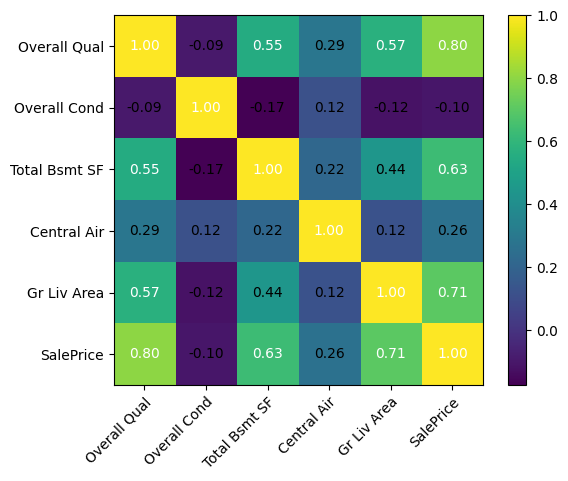

In [36]:
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

## Implementing an ordinary least squares linear regression model